# Linear Regression

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

**We define hereunder our model $\hat{y}$ with parameters $\theta_0$ and $\theta_1$**
$$\hat{y}=\theta_1*x+\theta_0$$

In [2]:
def predict(x, theta0, theta1):
    return np.dot(x, theta1) + theta0

**Then we go for the loss function, in this example we use the MSE**
$$L(\theta_0, \theta_1, x, y) = \frac{1}{N}\sum_{i=1}^{N}(y_i - (\theta_1*x_i+\theta_0))²$$

In [3]:
def loss(y, y_pred):
    return 1/(len(y)) * np.sum((y - y_pred)**2)

**As we will use a gradient descent algorithm we define a function to compute thoise gradients**
$$\frac{\partial L}{\partial \theta_0} = \frac{-2}{N}\sum_{i=1}^{N}(y_i - (\theta_1*x_i+\theta_0))$$
$$\frac{\partial L}{\partial \theta_1} = \frac{-2}{N}\sum_{i=1}^{N}x_i(y_i - (\theta_1*x_i+\theta_0))$$

*$nb: (u^n)'=n*u'*u^{n-1}$*

In [4]:
def gradients(y, x, theta0, theta1):
    
    grad_theta0 = -2/(len(y)) * np.sum((y - (np.dot(x, theta1) + theta0)))
    grad_theta1 = -2/(len(y)) * np.dot(x, (y - (np.dot(x, theta1) + theta0)))
    
    return grad_theta0, grad_theta1
    

**Finally we pack it up and create a train function**

In [5]:
def train(x, y, theta0, theta1, learning_rate):
    
    loss_history = list()
    last_loss = np.inf
    condition = True
    step = 0
    linspace_x = np.linspace(min(x), max(x), num=2)
    thetas = list()
    
    while condition:
        y_pred = predict(x, theta0, theta1)
        curr_loss = loss(y, y_pred)
        
        grad_theta0, grad_theta1 = gradients(y, x, theta0, theta1)
        theta0 -= grad_theta0 * learning_rate 
        theta1 -= grad_theta1 * learning_rate
        
        condition = np.abs(curr_loss - last_loss) > 0.00001
        
        loss_history.append(curr_loss)
        thetas.append([deepcopy(theta0), deepcopy(theta1)])
        
        last_loss = curr_loss
        
        step += 1
        if step % 30 == 0:
            plt.scatter(x, y)
            plt.plot(linspace_x, predict(linspace_x, theta0, theta1), c='r')
            plt.axis('equal')
            plt.xlabel('X')
            plt.ylabel('Y')
            plt.show()
    
    plt.plot(range(len(loss_history)), loss_history)
    plt.xlabel('step')
    plt.ylabel('Loss')
    plt.show()
    r2 = 1 - (np.sum((y - y_pred)**2))/(np.sum((y - np.mean(y))**2))
    print(f"r^2: {r2}\nstep: {step}")
    
    return np.array(thetas), np.array(loss_history)

**Create dataset**  
*We create a positive-semidefinite matrix randomly to have a new covariance each time. 
A random mean is generated also.*

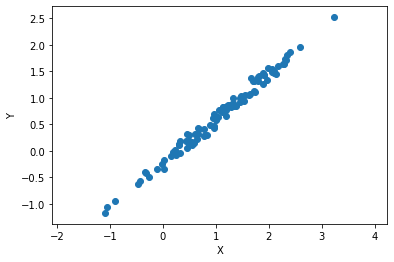

In [6]:
A = np.random.rand(2, 2)
cov = np.dot(A, A.transpose())
mean = np.random.rand(2)

dset = np.random.multivariate_normal(mean=mean, cov=cov, size=(100, 1)).reshape(100, 2)
x, y = dset[:, 0], dset[:, 1]
plt.scatter(x, y)
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

**Initialize weight**  
We initialize our weight $\theta_0$ & $\theta_1$ with a gaussian prior

In [7]:
theta0, theta1 = np.random.normal(size=(2, ))

**TRAIN**
As a metrics we use the $R²$ score
$$R²=1 - \frac{\sum_{i=1}^{N}(y_i-\hat{y_i})²}{\sum_{i=1}^{N}(y_i-\overline{y_i})²}$$

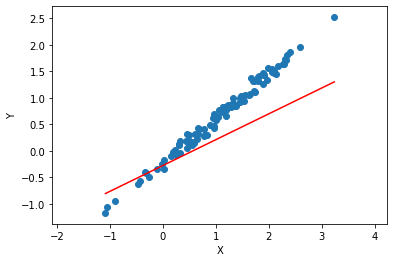

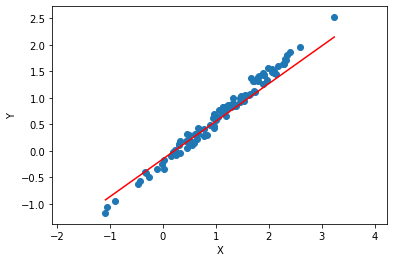

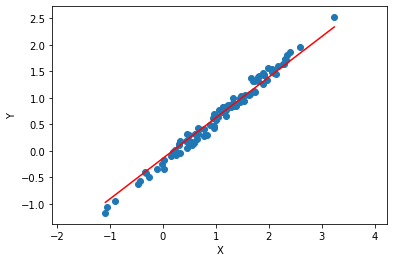

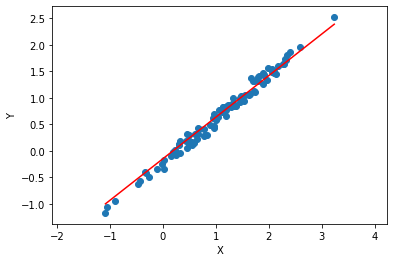

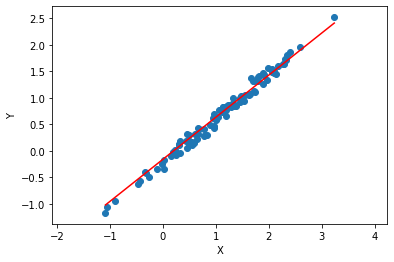

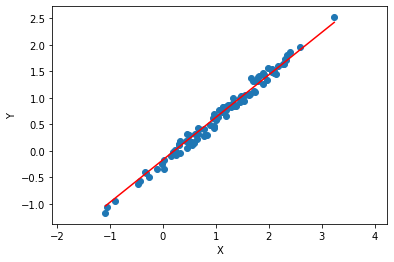

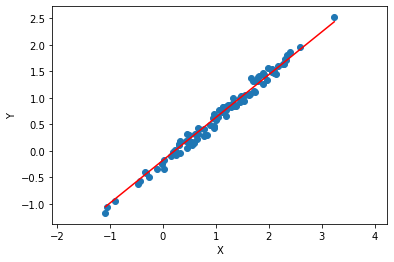

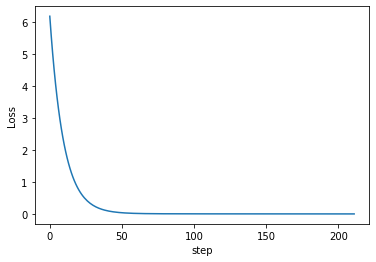

r^2: 0.9855875697984117
step: 212


In [8]:
thetas, loss_history = train(x, y, theta0, theta1, 0.01)

In [9]:
theta0_optim = thetas[-1][0]
theta1_optim = thetas[-1][1]

**Gradient descent visualisation**

In [10]:
from mpl_toolkits import mplot3d
from tqdm import tqdm

In [11]:
theta0_history, theta1_history = thetas[:, 0], thetas[:, 1]

theta0_linspace = np.linspace(-2, 2, num=1000)
theta1_linspace = np.linspace(-2, 2, num=1000)
THETA0, THETA1 = np.meshgrid(theta0_linspace, theta1_linspace)
Z = list()

for t0 in tqdm(theta0_linspace):
    subZ = list()
    for t1 in theta1_linspace:
        subZ.append(loss(y, predict(x, t0, t1)))
    Z.append(subZ)
Z = np.array(Z)

100%|██████████| 1000/1000 [00:10<00:00, 99.05it/s]


Text(0.5, 0, 'Loss')

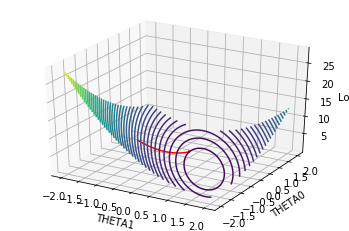

In [12]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(THETA0, THETA1, Z, 50)
ax.plot(theta0_history, theta1_history, loss_history, c='r')
ax.set_xlabel('THETA1')
ax.set_ylabel('THETA0')
ax.set_zlabel('Loss')

**TEST**

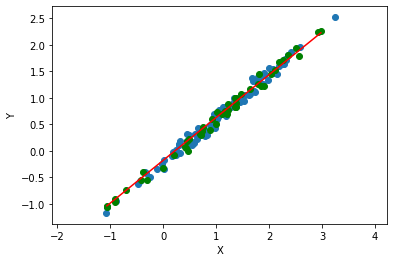

In [14]:
dset_test = np.random.multivariate_normal(mean=mean, cov=cov, size=(50, 1)).reshape(50, 2)
x_test, y_test = dset_test[:, 0], dset_test[:, 1]

linspace_x = np.linspace(min(x_test), max(x_test), num=2)
plt.scatter(x, y)
plt.scatter(x_test, y_test, c='g')
plt.plot(linspace_x, predict(linspace_x, theta0_optim, theta1_optim), c='r')
plt.axis('equal')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

In [15]:
y_pred_test = predict(x_test, theta0_optim, theta1_optim)

In [16]:
r2 = 1 - (np.sum((y_test - y_pred_test)**2))/(np.sum((y_test - np.mean(y_test))**2))
r2

0.9906601582188014